# Тестовое задание от МТС

Выполнил: Шевченко Алексей

In [1]:
import pandas as pd
import numpy as np 

# Путь к файлу
file_path = "d:\\BMSTU_im_Baumana\\WORK\\М.Тех_ТЗ_DS\\М.Тех_Данные_к_ТЗ_DS.csv"

In [2]:
%pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import chardet
with open(file_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'windows-1251', 'confidence': 0.99, 'language': 'Russian'}

In [4]:
df = pd.read_csv(file_path, sep=",", encoding='windows-1251')
df

,"Количество больничных дней,""Возраст"",""Пол"""
0,"5,39,""Ж"""
1,"4,54,""М"""
2,"4,26,""М"""
3,"5,42,""М"""
4,"4,29,""М"""
...,...
232,"5,30,""М"""
233,"4,36,""Ж"""
234,"2,60,""Ж"""
235,"2,44,""Ж"""


In [5]:
df["sep"] = df["Количество больничных дней,\"Возраст\",\"Пол\""].str.split(",")
df

,"Количество больничных дней,""Возраст"",""Пол""",sep
0,"5,39,""Ж""","[5, 39, ""Ж""]"
1,"4,54,""М""","[4, 54, ""М""]"
2,"4,26,""М""","[4, 26, ""М""]"
3,"5,42,""М""","[5, 42, ""М""]"
4,"4,29,""М""","[4, 29, ""М""]"
...,...,...
232,"5,30,""М""","[5, 30, ""М""]"
233,"4,36,""Ж""","[4, 36, ""Ж""]"
234,"2,60,""Ж""","[2, 60, ""Ж""]"
235,"2,44,""Ж""","[2, 44, ""Ж""]"


In [6]:
col = []
age = []
sex = []

for i in range(df.shape[0]):
    rowSep = df.iloc[i]["sep"]

    col.append(int(rowSep[0]))
    age.append(int(rowSep[1]))
    sex.append(rowSep[2][1])

df["Количество больничных дней"] = col
df["Возраст"] = age
df["Пол"] = sex

df

,"Количество больничных дней,""Возраст"",""Пол""",sep,Количество больничных дней,Возраст,Пол
0,"5,39,""Ж""","[5, 39, ""Ж""]",5,39,Ж
1,"4,54,""М""","[4, 54, ""М""]",4,54,М
2,"4,26,""М""","[4, 26, ""М""]",4,26,М
3,"5,42,""М""","[5, 42, ""М""]",5,42,М
4,"4,29,""М""","[4, 29, ""М""]",4,29,М
...,...,...,...,...,...
232,"5,30,""М""","[5, 30, ""М""]",5,30,М
233,"4,36,""Ж""","[4, 36, ""Ж""]",4,36,Ж
234,"2,60,""Ж""","[2, 60, ""Ж""]",2,60,Ж
235,"2,44,""Ж""","[2, 44, ""Ж""]",2,44,Ж


In [7]:
df = df.drop(["Количество больничных дней,\"Возраст\",\"Пол\"", "sep"], axis=1)
df

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
...,...,...,...
232,5,30,М
233,4,36,Ж
234,2,60,Ж
235,2,44,Ж


Для дальнейшего удобсвта обращения решил перейти к номовым названиям колонок

Замена на "medical_days", "age" и "sex" соотвественно

In [8]:
df.rename(columns={'Количество больничных дней':'medical_days', 'Возраст': 'age', 'Пол': 'sex'}, inplace=True)
df

,medical_days,age,sex
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
...,...,...,...
232,5,30,М
233,4,36,Ж
234,2,60,Ж
235,2,44,Ж


In [9]:
df.dtypes

medical_days     int64
age              int64
sex             object
dtype: object

In [10]:
df.describe()

,medical_days,age
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


### Приступим к рассмотрению 1 гипотезы

ГИПОТЕЗА_1: Мужчины пропускают в течение года более 2 рабочих дней (medical_days) по болезни значимо чаще женщин.

In [11]:
N1, N2 = df.sex.value_counts()
print(f"Количество мужчин: {N1}, количество женщин: {N2}")
# Cколько вообще мужчин и женщин

Количество мужчин: 139, количество женщин: 98


In [12]:
df[df.sex == 'М'].medical_days.value_counts()
# Распределение мужчин по пропущенным дням, численно

medical_days
3    31
2    31
4    25
1    16
5    12
0     8
7     7
6     5
8     4
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

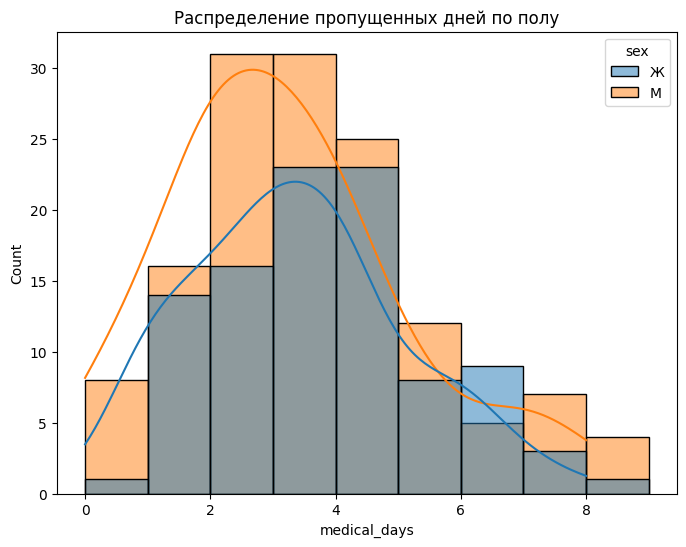

In [14]:
bins = np.arange(0, 10, 1)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='medical_days', hue='sex', kde=True, bins = bins)
plt.title('Распределение пропущенных дней по полу')
plt.show()
# Строим гистограмму, показывающую распределение пропущенных дней относительно пола сотрудника

Видим что мужчин в компании больше, следовательно статистика, показывающая количество, нас не интересует.

Произведем сравнение средних по T-критерию

Так как выборки независимы:

1 выборка - мужчины, 2 выборка - женщины.

Выборки: 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>X</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>11</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
      <mi>N</mi>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>&#x223C;</mo>
  <mi>N</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>&#x3BC;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>&#x3C3;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>21</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>,</mo>
  <msub>
    <mi>X</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>2</mn>
      <mi>N</mi>
      <mn>2</mn>
    </mrow>
  </msub>
  <mo>&#x223C;</mo>
  <mi>N</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>&#x3BC;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>2</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>&#x3C3;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>2</mn>
    </mrow>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>,</mo>
  <msub>
    <mi>&#x3C3;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>&#x3C3;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>2</mn>
    </mrow>
  </msub>
</math> - не известны

Выдвинем нулевую гипотезу:
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x3BC;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>&#x2264;</mo>
  <msub>
    <mi>&#x3BC;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>2</mn>
    </mrow>
  </msub>
</math>

Соответственно, альтернативная гипотеза: 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x3BC;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>&#x3E;</mo>
  <msub>
    <mi>&#x3BC;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>2</mn>
    </mrow>
  </msub>
</math>

Статистика:
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>T</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>N</mi>
    </mrow>
  </msub>
</math>


<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mi>T</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>N</mi>
    </mrow>
  </msub>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mover>
        <msub>
          <mi>X</mi>
          <mrow data-mjx-texclass="ORD">
            <mn>1</mn>
          </mrow>
        </msub>
        <mo accent="true">&#x2015;</mo>
      </mover>
      <mo>&#x2212;</mo>
      <mover>
        <msub>
          <mi>X</mi>
          <mrow data-mjx-texclass="ORD">
            <mn>2</mn>
          </mrow>
        </msub>
        <mo accent="true">&#x2015;</mo>
      </mover>
    </mrow>
    <msqrt>
      <mfrac>
        <msubsup>
          <mi>S</mi>
          <mrow data-mjx-texclass="ORD">
            <mn>1</mn>
          </mrow>
          <mrow data-mjx-texclass="ORD">
            <mn>2</mn>
          </mrow>
        </msubsup>
        <msub>
          <mi>N</mi>
          <mrow data-mjx-texclass="ORD">
            <mn>1</mn>
          </mrow>
        </msub>
      </mfrac>
      <mo>&#x2212;</mo>
      <mfrac>
        <msubsup>
          <mi>S</mi>
          <mrow data-mjx-texclass="ORD">
            <mn>2</mn>
          </mrow>
          <mrow data-mjx-texclass="ORD">
            <mn>2</mn>
          </mrow>
        </msubsup>
        <msub>
          <mi>N</mi>
          <mrow data-mjx-texclass="ORD">
            <mn>2</mn>
          </mrow>
        </msub>
      </mfrac>
    </msqrt>
  </mfrac>
</math>

Нулевое распределение: 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x422;</mi>
    <mrow data-mjx-texclass="ORD">
      <mi>N</mi>
    </mrow>
  </msub>
  <mo>&#x223C;</mo>
  <mi>S</mi>
  <mi>t</mi>
  <mo stretchy="false">(</mo>
  <mi>v</mi>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
</math>

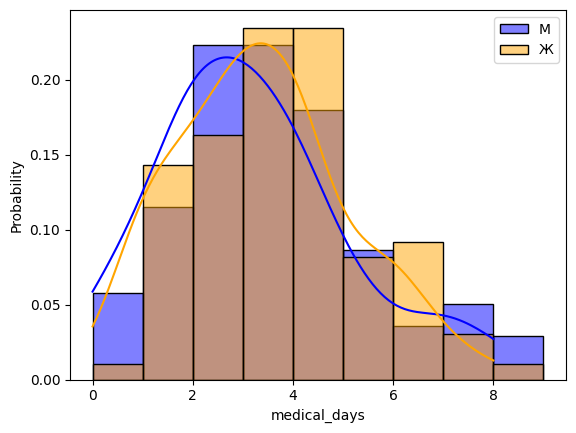

In [15]:
bins = np.arange(0, 10, 1)
sns.histplot(
    df[df.sex == 'М'].medical_days, bins=bins,
    color='blue', alpha=0.5, label='M', stat='probability', kde = True)
sns.histplot(
    df[df.sex == 'Ж'].medical_days, bins=bins,
    color='orange', alpha=0.5, label='Ж', stat='probability', kde = True)
plt.legend(loc=1)
plt.show()
# Строим гистограмму, показывающую распределение вероятности количества пропущенных дней относительно пола сотрудника

In [16]:
t_statistic, p_value = ttest_ind(
    df[(df.sex == 'М') & (df.medical_days > 2)].medical_days,
    df[(df.sex == 'Ж') & (df.medical_days > 2)].medical_days,
    equal_var=False,
    alternative='less'
)

print('Гипотеза 1: Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.')
print('p-value:', p_value)
print('statistic:', t_statistic)

Гипотеза 1: Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.
p-value: 0.6635666716601236
statistic: 0.42305776080458846


По p-value можно судить о том, что у нас нет достаточно доказательств, чтобы отбросить нулевую гипотезу и принять альтернативную гипотезу.

Исходя из этих результатов, мы не можем сделать вывод, что мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.

### Приступим к рассмотрению 2 гипотезы 

ГИПОТЕЗА_2: Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (medical_days) по болезни значимо чаще своих более молодых коллег.

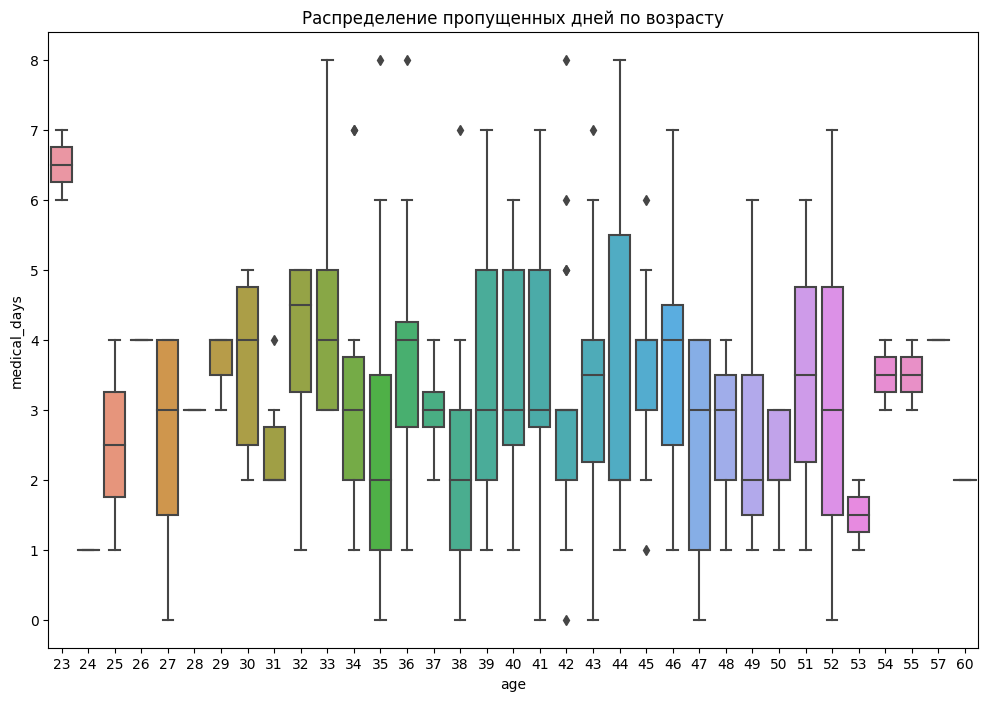

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age', y='medical_days', data=df)
plt.title('Распределение пропущенных дней по возрасту')
plt.show()

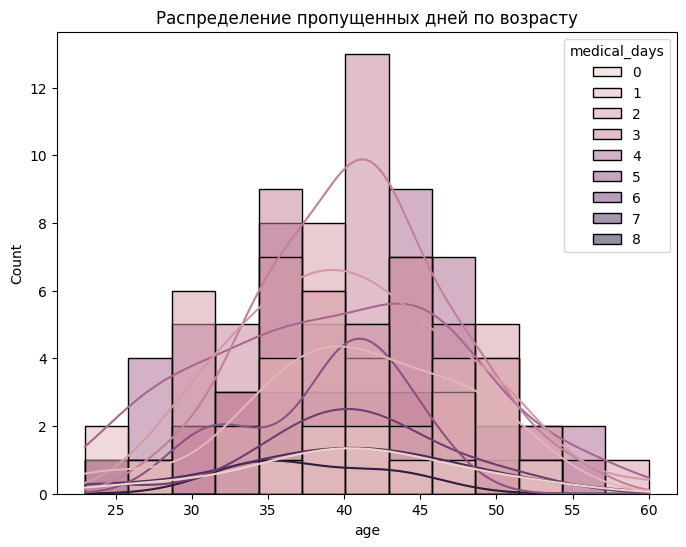

In [18]:
bins = np.arange(0, 60, 1)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', hue='medical_days', kde=True)
plt.title('Распределение пропущенных дней по возрасту')
plt.show()
# Строим гистограмму, показывающую распределение пропущенных дней относительно возраста сотрудника

In [19]:
df["age_type"] = ['old' if age > 35 else 'young' for age in df['age']]
df.head()
# Создадим отдельную бинарную колонку, показывающую, к какой возрастной группе относится сотрудник

,medical_days,age,sex,age_type
0,5,39,Ж,old
1,4,54,М,old
2,4,26,М,young
3,5,42,М,old
4,4,29,М,young


In [20]:
df["age_type"].value_counts()

age_type
old      180
young     57
Name: count, dtype: int64

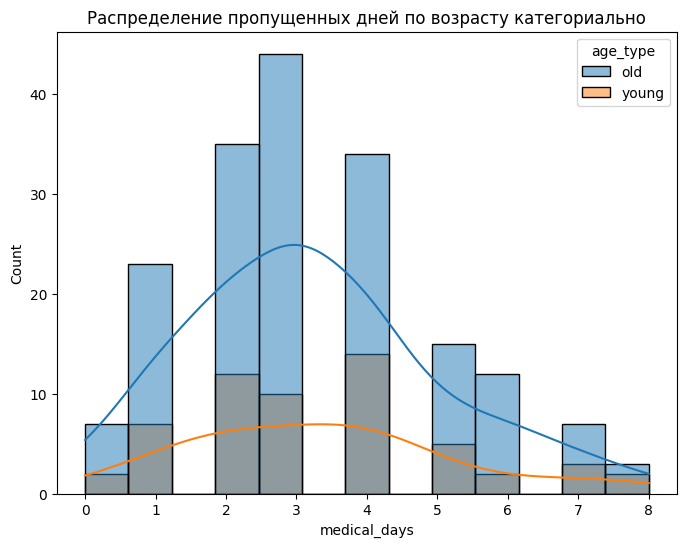

In [21]:
bins = np.arange(0, 10, 1)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, hue='age_type', x='medical_days', kde=True)
plt.title('Распределение пропущенных дней по возрасту категориально')
plt.show()

Как в предыдущем случае, из-за различий в количестве представителей групп, нас не интересует данная статистика

Произведем сравнение средних по T-критерию, как в прошлом случае:

Выдвинем нулевую гипотезу: 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x3BC;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>&#x2264;</mo>
  <msub>
    <mi>&#x3BC;</mi>
    <mrow data-mjx-texclass="ORD">
      <mn>2</mn>
    </mrow>
  </msub>
</math>

Соответственно, альтернативная гипотеза:
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x3BC;</mi>
      <mrow data-mjx-texclass="ORD">
       <mn>1</mn>
    </mrow>
    </msub>
    <mo>&#x3E;</mo>
    </msub>
     <mi>&#x3BC;</mi>
      <mrow data-mjx-texclass="ORD">
       <mn>1</mn>
    </mrow>
  </msub>
</math>

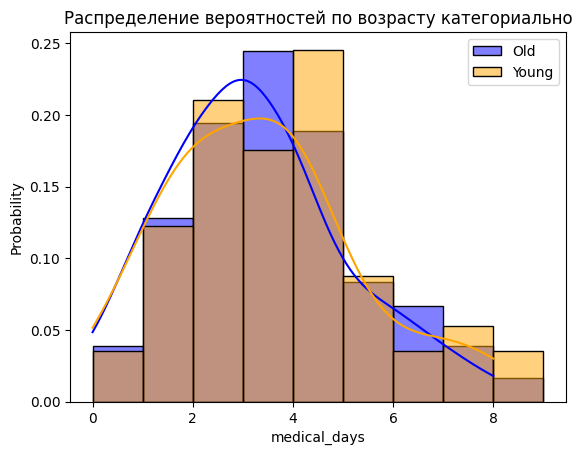

In [22]:
bins = np.arange(0, 10, 1)
sns.histplot(
    df[df.age_type == 'old'].medical_days, bins=bins,
    color='blue', alpha=0.5, label='Old', stat='probability', kde = True)
sns.histplot(
    df[df.age_type == 'young'].medical_days, bins=bins,
    color='orange', alpha=0.5, label='Young', stat='probability', kde = True)
plt.legend(loc=1)
plt.title('Распределение вероятностей по возрасту категориально')
plt.show()
# Строим гистограмму, показывающую распределение вероятности количества пропущенных дней относительно возраста сотрудника

In [23]:
t_statistic, p_value = ttest_ind(
    df[(df.age_type == 'old') & (df.medical_days > 2)].medical_days,
    df[(df.age_type == 'young') & (df.medical_days > 2)].medical_days,
    equal_var=False,
    alternative='less'
)

print('Гипотеза 2: Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.')
print('p-value:', p_value)
print('statistic:', t_statistic)

Гипотеза 2: Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.
p-value: 0.23387909366638765
statistic: -0.7311771255234804


Полученное значение p-value означает, что у нас нет достаточно доказательств, чтобы отбросить нулевую гипотезу и принять альтернативную гипотезу. 

Исходя из этих результатов, мы не можем сделать вывод, что работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег. Мы не имеем статистически значимых доказательств в пользу этой альтернативной гипотезы.